In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Travel.csv')

In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [10]:
df.dropna(inplace=True)
df.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [11]:
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [13]:
y

0       1
1       0
2       1
3       0
5       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4128, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
num = X_train.select_dtypes(include=['int64', 'float64']).columns
cat = X_train.select_dtypes(include=['object']).columns

In [17]:
import numpy as np

In [18]:
from sklearn.preprocessing import LabelEncoder
for col in cat:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # Fit on train data

    # Replace unseen labels in test data with 'unknown'
    known_classes = set(le.classes_)
    X_test[col] = X_test[col].apply(lambda x: x if x in known_classes else 'unknown')

    # Refit encoder with added 'unknown' category
    le.classes_ = np.append(le.classes_, 'unknown')
    X_test[col] = le.transform(X_test[col])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Fit and transform the data
for i in num:
    X_train[i] = sc.fit_transform(X_train[[i]])
    X_test[i] = sc.transform(X_test[[i]])

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [21]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
gbc.score(X_test, y_test)*100

86.27925746569815

In [24]:
from sklearn.metrics import classification_report   
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       991
           1       0.81      0.41      0.54       248

    accuracy                           0.86      1239
   macro avg       0.84      0.69      0.73      1239
weighted avg       0.86      0.86      0.84      1239



In [25]:
y_pred = gbc.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, y_pred)

array([[968,  23],
       [147, 101]])

In [31]:
## roc , auc

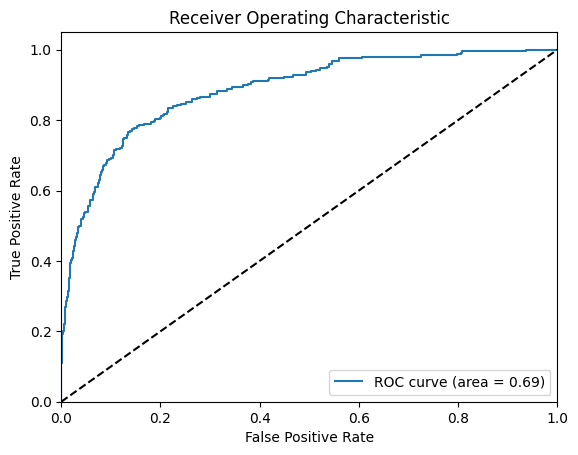

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, gbc.predict(X_test))

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Gradintboost Regression


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gbr = GradientBoostingRegressor()

In [35]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [36]:
gbr.score(X_test, y_test)*100

37.056191149645144

<BarContainer object of 18 artists>

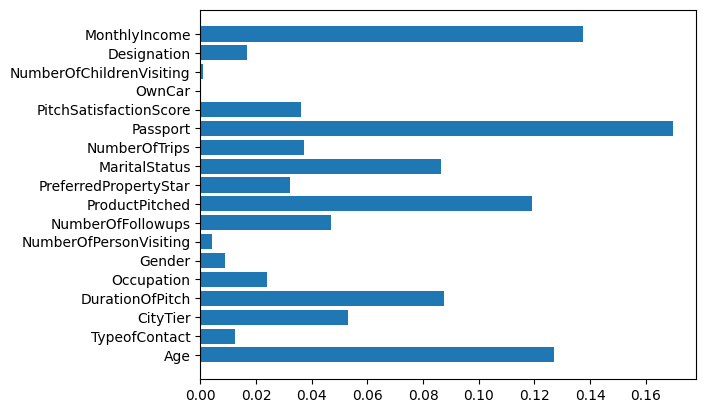

In [40]:
plt.barh(X_train.columns, gbc.feature_importances_)